In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import prince
from scipy.stats import chi2_contingency, chisquare

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("D:\Book\in-vehicle-coupon-recommendation.csv")
#dependent variable is 'Y', where 1 being coupon was accepted and 0 being not accepted

#feature 'car' has no description in the paper, nor in webpage: https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation#
#hence we delete this, as it has maximum missing data
del dataset['car']

#we also drop the missing value rows in other remaining features, as we do not know the reason why they exist.
#we will do our analysis on remaining data
dataset.dropna(inplace=True)
dataset.reset_index(drop=True,inplace=True)
dataset.shape

#create new column for dependent variable for visualization purpose
dataset['couponstatus'] = np.where(dataset['Y']==1,'accepted','not accepted')


In [3]:
dataset[dataset.columns[0:12]].head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree


In [4]:
dataset[dataset.columns[12:]].head()

,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,couponstatus
0,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1,accepted
1,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0,not accepted
2,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1,accepted
3,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0,not accepted
4,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0,not accepted


In [5]:
list(dataset.columns[[2,5,9,12,15]])

['weather', 'coupon', 'maritalStatus', 'occupation', 'CoffeeHouse']

# Descriptive statistics

### Weather

In [6]:
column='weather'
print('Crosstab in counts:\n')
print(pd.crosstab(dataset[column],dataset['couponstatus']))
print('\n\nCrosstab in row percentage:')
np.round(pd.crosstab(dataset[column],dataset['couponstatus'],normalize='index')*100,2)

Crosstab in counts:

couponstatus  accepted  not accepted
weather                             
Rainy              530           617
Snowy              634           697
Sunny             5713          3888


Crosstab in row percentage:


couponstatus,accepted,not accepted
weather,,
Rainy,46.21,53.79
Snowy,47.63,52.37
Sunny,59.50,40.50


### coupon

In [7]:
column='coupon'
print('Crosstab in counts:\n')
print(pd.crosstab(dataset[column],dataset['couponstatus']))
print('\n\nCrosstab in row percentage:')
np.round(pd.crosstab(dataset[column],dataset['couponstatus'],normalize='index')*100,2)

Crosstab in counts:

couponstatus           accepted  not accepted
coupon                                       
Bar                         788          1125
Carry out & Take away      1682           598
Coffee House               1894          1922
Restaurant(20-50)           632           785
Restaurant(<20)            1881           772


Crosstab in row percentage:


couponstatus,accepted,not accepted
coupon,,
Bar,41.19,58.81
Carry out & Take away,73.77,26.23
Coffee House,49.63,50.37
Restaurant(20-50),44.60,55.40
Restaurant(<20),70.90,29.10


### maritalStatus

In [8]:
column='maritalStatus'
print('Crosstab in counts:\n')
print(pd.crosstab(dataset[column],dataset['couponstatus']))
print('\n\nCrosstab in row percentage:')
np.round(pd.crosstab(dataset[column],dataset['couponstatus'],normalize='index')*100,2)

Crosstab in counts:

couponstatus       accepted  not accepted
maritalStatus                            
Divorced                265           239
Married partner        2623          2208
Single                 2800          1788
Unmarried partner      1138           910
Widowed                  51            57


Crosstab in row percentage:


couponstatus,accepted,not accepted
maritalStatus,,
Divorced,52.58,47.42
Married partner,54.30,45.70
Single,61.03,38.97
Unmarried partner,55.57,44.43
Widowed,47.22,52.78


### occupation

In [9]:
column='occupation'
print('Crosstab in counts:\n')
print(pd.crosstab(dataset[column],dataset['couponstatus']))
print('\n\nCrosstab in row percentage:')
np.round(pd.crosstab(dataset[column],dataset['couponstatus'],normalize='index')*100,2)

Crosstab in counts:

couponstatus                               accepted  not accepted
occupation                                                       
Architecture & Engineering                      111            64
Arts Design Entertainment Sports & Media        301           263
Building & Grounds Cleaning & Maintenance        26            18
Business & Financial                            294           222
Community & Social Services                     109           110
Computer & Mathematical                         771           597
Construction & Extraction                       106            48
Education&Training&Library                      439           416
Farming Fishing & Forestry                       23            20
Food Preparation & Serving Related              156           120
Healthcare Practitioners & Technical            159            63
Healthcare Support                              169            73
Installation Maintenance & Repair                71    

couponstatus,accepted,not accepted
occupation,,
Architecture & Engineering,63.43,36.57
Arts Design Entertainment Sports & Media,53.37,46.63
Building & Grounds Cleaning & Maintenance,59.09,40.91
Business & Financial,56.98,43.02
Community & Social Services,49.77,50.23
Computer & Mathematical,56.36,43.64
Construction & Extraction,68.83,31.17
Education&Training&Library,51.35,48.65
Farming Fishing & Forestry,53.49,46.51


### CoffeeHouse

In [10]:
column='CoffeeHouse'
print('Crosstab in counts:\n')
print(pd.crosstab(dataset[column],dataset['couponstatus']))
print('\n\nCrosstab in row percentage:')
np.round(pd.crosstab(dataset[column],dataset['couponstatus'],normalize='index')*100,2)

Crosstab in counts:

couponstatus  accepted  not accepted
CoffeeHouse                         
1~3               2060          1099
4~8               1047           612
gt8                648           463
less1             1824          1474
never             1298          1554


Crosstab in row percentage:


couponstatus,accepted,not accepted
CoffeeHouse,,
1~3,65.21,34.79
4~8,63.11,36.89
gt8,58.33,41.67
less1,55.31,44.69
never,45.51,54.49


# Correspondence Analysis

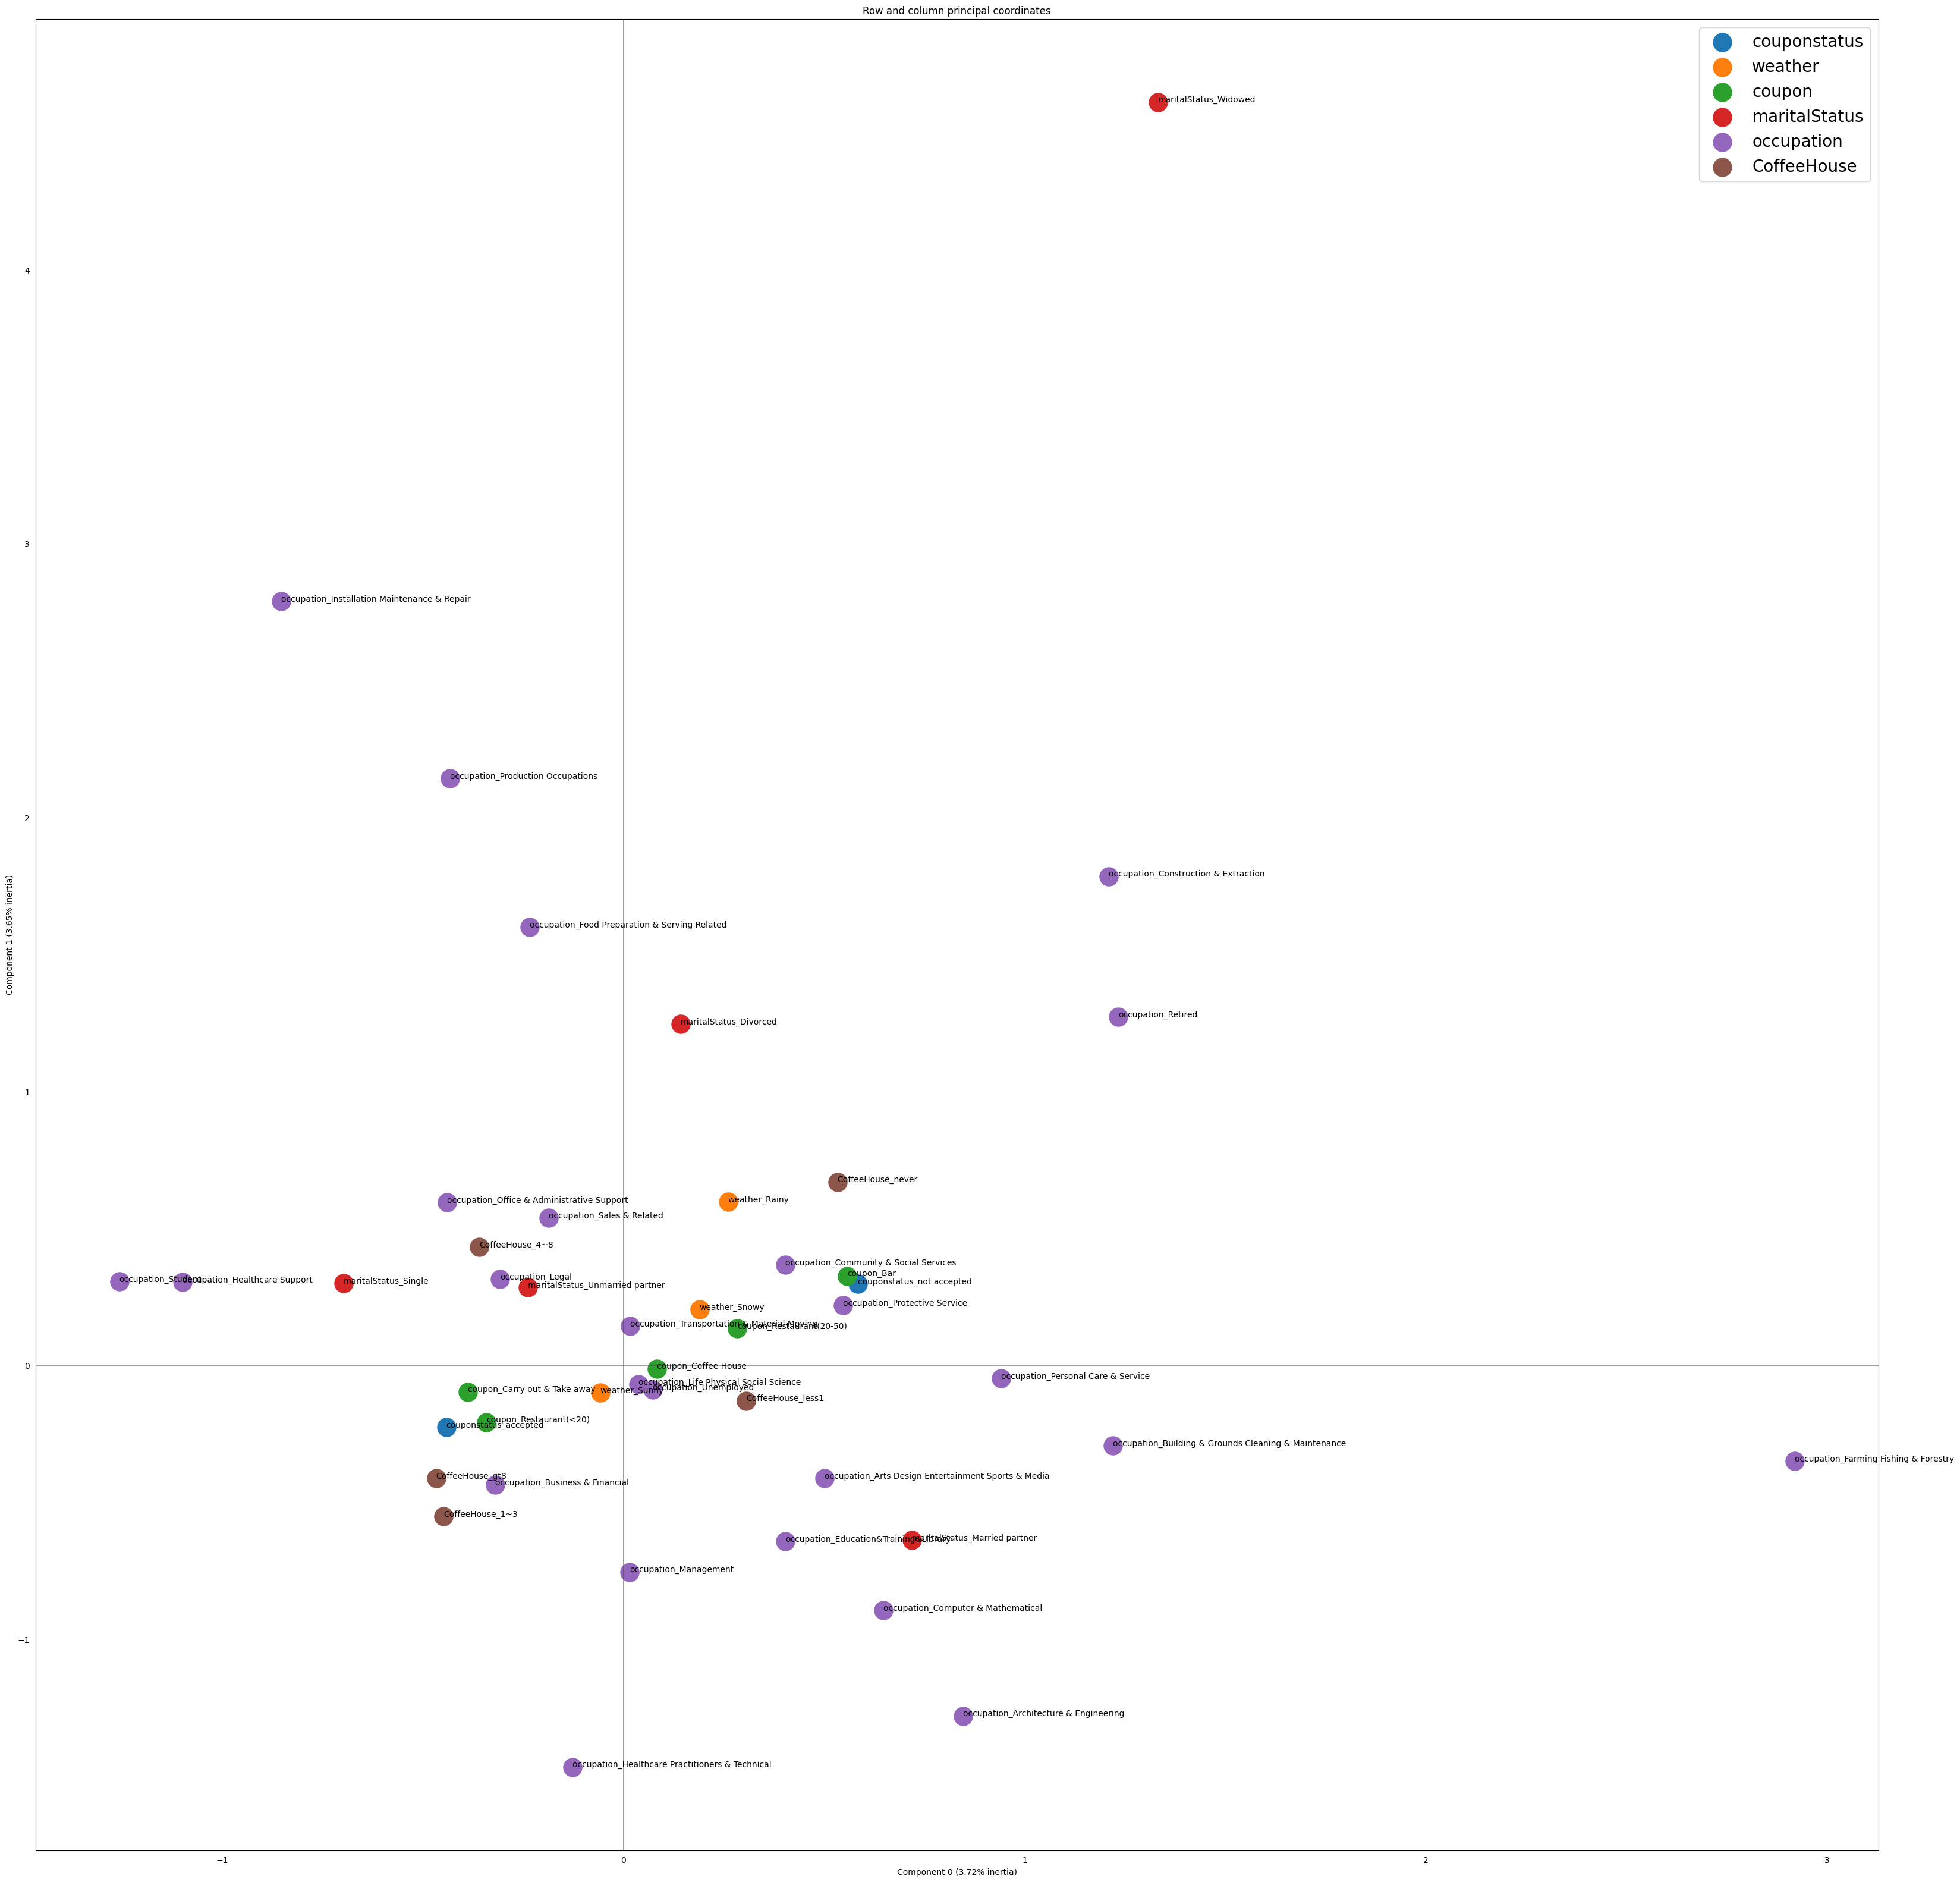

In [11]:
column=['weather', 'coupon', 'maritalStatus', 'occupation', 'CoffeeHouse']

dataset_mc = dataset[['couponstatus']+column]
mc = prince.MCA(n_components=2,n_iter=10,copy=True,check_input=True,engine='auto',random_state=1)
mc_model = mc.fit(dataset_mc)

ax = mc_model.plot_coordinates(X=dataset_mc,ax=None,figsize=(40, 40),show_row_points=False,row_points_size=0,
        show_row_labels=False,show_column_points=True,column_points_size=500,show_column_labels=True,legend_n_cols=60).legend(loc='best', bbox_to_anchor=(1, 1),fontsize=20)

plt.grid(b=None)


# Feature creation and chi-square test

In [12]:
#create 2 feature

dataset_mc['accepted_coupon']=np.where(((dataset_mc['weather']=='Sunny') & (dataset_mc['occupation']=='Business & Financial') & (dataset_mc['CoffeeHouse'].isin(['1~3','gt8'])) & (dataset_mc['coupon'].isin(['Carry out & Take away','Restaurant(<20)']))),1,0)
dataset_mc['rejected_coupon']=np.where(((dataset_mc['CoffeeHouse']=='never') & (dataset_mc['occupation']=='Community & Social Services') & (dataset_mc['weather'].isin(['Rainy','Snowy'])) & (dataset_mc['coupon'].isin(['Bar','Restaurant(20-50)']))),1,0)

In [13]:
### accepted_coupon

stat, p, dof, expected=chi2_contingency(pd.crosstab(dataset_mc['accepted_coupon'], dataset_mc['couponstatus']))
alpha = 0.05
print("p value is " + str(np.format_float_positional(p, trim='-')))
if round(p,2) <= alpha:
    print('Reject null hypothesis! There is relationship between two variables and the feature is useful.')
else:
    print('Accept null hypothesis! There is no relationship between two variables.')

p value is 0.002264486135215737
Reject null hypothesis! There is relationship between two variables and the feature is useful.


In [14]:
### rejected_coupon

stat, p, dof, expected=chi2_contingency(pd.crosstab(dataset_mc['rejected_coupon'], dataset_mc['couponstatus']))
alpha = 0.05
print("p value is " + str(np.format_float_positional(p, trim='-')))
if round(p,2) <= alpha:
    print('Reject null hypothesis! There is relationship between two variables and the feature is useful.')
else:
    print('Accept null hypothesis! There is no relationship between two variables.')

p value is 0.01466733456994625
Reject null hypothesis! There is relationship between two variables and the feature is useful.
